In [1]:
import pandas as pd
import os

In [2]:
os.chdir('./p2')

In [3]:
os.listdir()

['temps.csv']

In [4]:
df =pd.read_csv('temps.csv')

In [7]:
df.to_csv('problem1.csv',index=False)

# p2

In [173]:
from pandas.tseries.offsets import Day, Hour, Minute, Second
myfreq =  Minute(5)
df = pd.date_range('2050-01-01', periods = 2976*3, freq = myfreq)



In [174]:
tg = df.strftime('%Y-%m-%d %H:%M:%S')

In [175]:
z = []

for v in range(45):
    t = pd.DataFrame(columns = ['houseCode','date','power consumption'])
    t['date'] = tg
    t['power consumption'] = abs(np.random.normal(0,100, size=(len(t))))
    t['houseCode'] = 'house_'+str(v).zfill(2)
    z.append(t)

In [176]:
total =pd.concat(z).sample(len(pd.concat(z))).reset_index(drop=True)

In [177]:
total.to_csv('problem2.csv',index=False)

In [178]:
ttt =pd.read_csv('problem2.csv')

In [179]:
tt = ttt.sort_values(['houseCode','date']).reset_index(drop=True)

In [180]:
tt['date'] = pd.to_datetime(tt['date'])

In [181]:
tg = tt.groupby(['houseCode']).resample('15min', on='date')['power consumption'].sum().reset_index()

In [187]:
tg = tg.rename(columns= {'power consumption':'power consumption sum'})

In [190]:
tgg = tg.copy()

In [195]:
tgg['c'] =tgg['houseCode'].str[-2:].astype('int')
tgg['d'] =tgg['date'].dt.hour
tgg['e'] =tgg['date'].dt.day

In [214]:
from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=5)
kmeans.fit(tgg.iloc[:,2:].values)

KMeans(n_clusters=5)

In [215]:
tg['Cluster'] =kmeans.labels_

In [216]:
tg

,houseCode,date,power consumption sum,Cluster
0,house_00,2050-01-01 00:00:00,136.249952,1
1,house_00,2050-01-01 00:15:00,98.283387,1
2,house_00,2050-01-01 00:30:00,53.967679,1
3,house_00,2050-01-01 00:45:00,204.821270,3
4,house_00,2050-01-01 01:00:00,150.760786,3
...,...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717,4
133916,house_44,2050-01-31 23:00:00,463.419892,2
133917,house_44,2050-01-31 23:15:00,369.930740,4
133918,house_44,2050-01-31 23:30:00,237.713030,0


In [218]:
import seaborn as sns

In [224]:
tg['day'] = tg.date.dt.day_name()

In [239]:
tg['min'] = tg.date.dt.strftime('%H:%M')

In [245]:
pv = tg.groupby(['Cluster','day','min'],as_index=False).sum()

In [258]:
pvt.iloc[0,:] = 0

In [ ]:
pvt

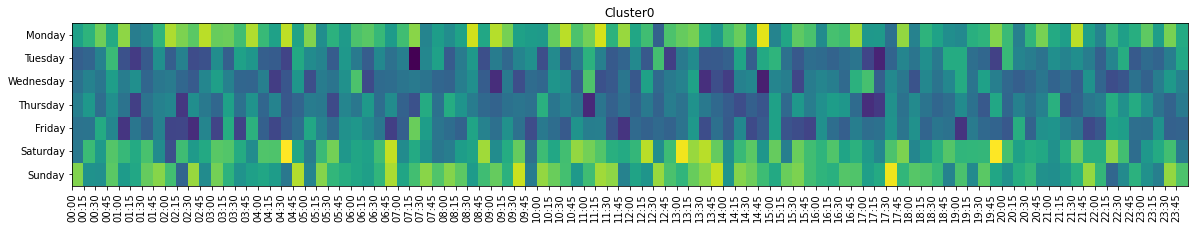

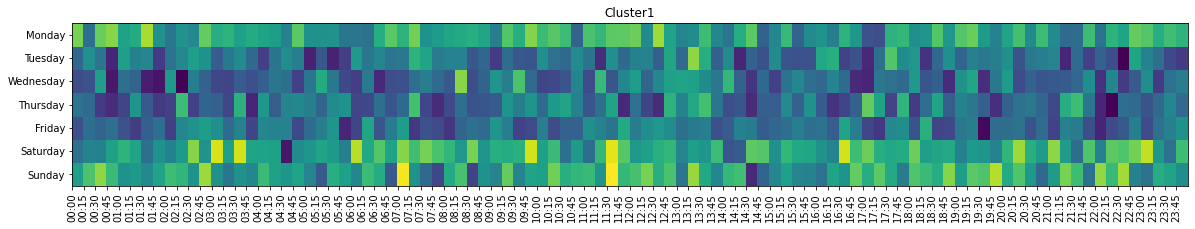

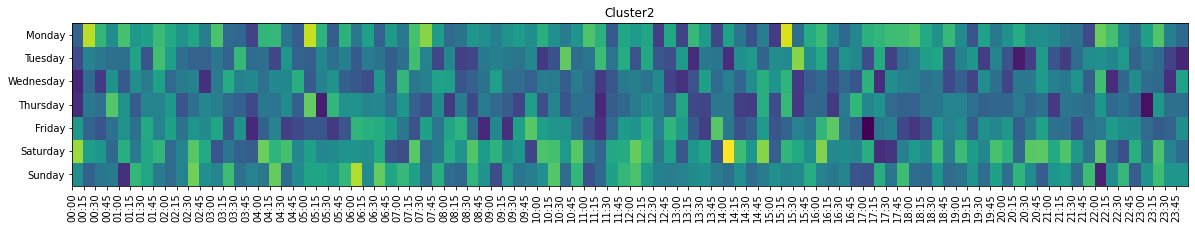

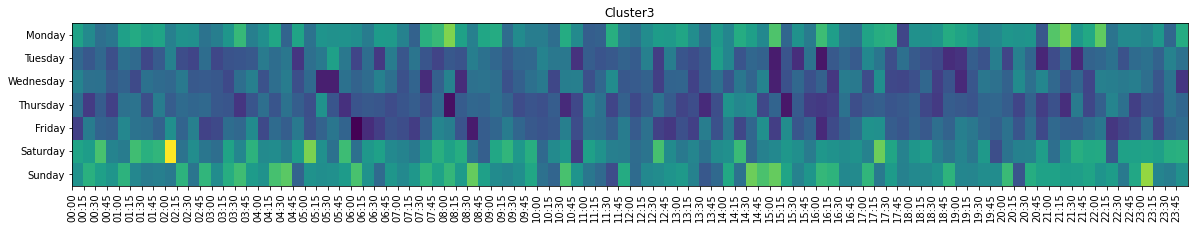

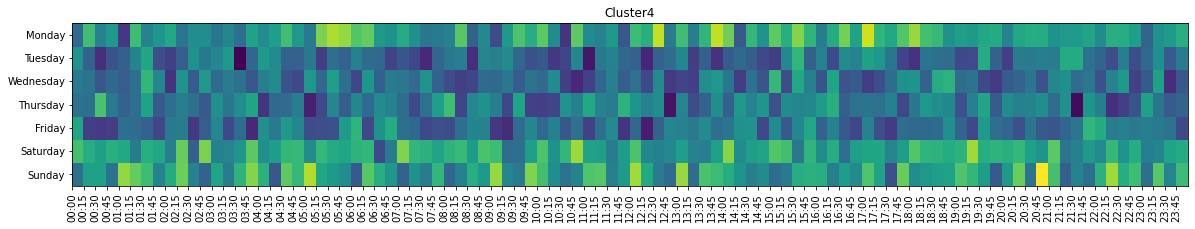

In [270]:
for v in range(5):
    plt.figure(figsize=(20,3))
    target = pv.loc[pv.Cluster==v]
    pvt = target.pivot(index='day',columns='min',values='power consumption sum').reindex(['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday'])
    plt.pcolor(pvt)
    plt.title('Cluster'+str(v))
    plt.xticks(range(len(pvt.columns)),pvt.columns,rotation=90)
    plt.yticks(np.arange(len(pvt.index))+0.5,pvt.index)


# 3


In [271]:
d =pd.read_csv('/Users/ds/Downloads/all_breakdown.csv/all_breakdown.csv')

In [276]:
d.isnull().sum()

TIMESTAMP            0
BIOGAS               0
BIOMASS              0
GEOTHERMAL           0
Hour                 0
SMALL HYDRO          0
SOLAR            44904
SOLAR PV         22680
SOLAR THERMAL    22680
WIND TOTAL           0
dtype: int64

In [285]:
d[~d['SOLAR PV'].isnull()].i

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
24,2013-05-29 00:00:00,210.0,326.0,895.0,1.0,343.0,NaN,0.0,0.0,3454.0
25,2013-05-29 01:00:00,210.0,323.0,895.0,2.0,341.0,NaN,0.0,0.0,3268.0
26,2013-05-29 02:00:00,210.0,326.0,896.0,3.0,342.0,NaN,0.0,0.0,3202.0
27,2013-05-29 03:00:00,210.0,322.0,896.0,4.0,342.0,NaN,0.0,0.0,3007.0
28,2013-05-29 04:00:00,209.0,313.0,891.0,5.0,345.0,NaN,2.0,0.0,2563.0
...,...,...,...,...,...,...,...,...,...,...
67579,2013-01-28 19:00:00,209.0,331.0,924.0,20.0,404.0,NaN,0.0,0.0,2633.0
67580,2013-01-28 20:00:00,207.0,334.0,924.0,21.0,372.0,NaN,0.0,0.0,2540.0
67581,2013-01-28 21:00:00,208.0,342.0,926.0,22.0,372.0,NaN,0.0,0.0,2408.0
67582,2013-01-28 22:00:00,208.0,334.0,928.0,23.0,358.0,NaN,0.0,0.0,2274.0


In [251]:
pvt = target.pivot(index='day',columns='min',values='power consumption sum').reindex(['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])

In [7]:
os.listdir()

['preprocessing.ipynb', '.DS_Store', 'p1.csv', '.ipynb_checkpoints']

In [8]:
df = pd.read_csv('p1.csv')

In [23]:
df.loc[sorted(df.sample(50).index.to_list()),'Light'] = -99

In [24]:
import numpy as np
df.loc[sorted(df.sample(21).index.to_list()),'CO2'] = np.nan

In [28]:
df.to_csv('problem1.csv',index=False)

In [29]:
sp = pd.DataFrame()

In [30]:
sp['name'] = ['sample'+str(x) for x in range(1,13)]
sp['life span'] = [10000,9000,9500,10000,10000,8900,9900,10100,10300,10020,10000,9800]

In [32]:
sp.to_csv('problem2.csv',index=False)

# 3

In [33]:
covid = pd.read_csv('country_panel.csv/country_panel.csv')

In [34]:
c= covid.copy()

In [36]:
c['date'] = pd.to_datetime(c['date'])

In [48]:
d= c[(c['date']>=pd.to_datetime('2021-01-01')) & (c['date']<=pd.to_datetime('2021-11-01'))].reset_index(drop=True)

122


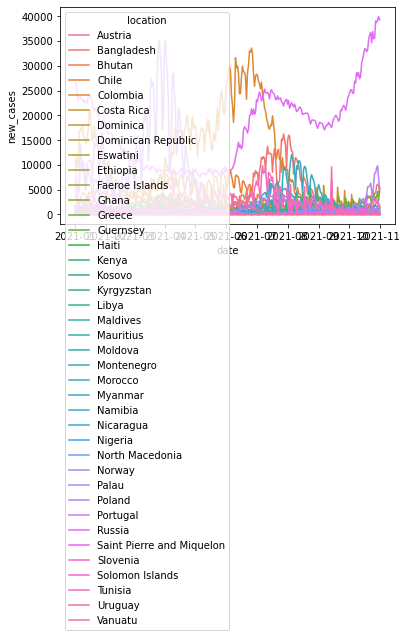

In [128]:
n=0
while True:
    e = d[d.location.isin(pd.Series(d.location.unique()).sample(40).values)].reset_index(drop=True)
    re  = e[['location','date','new_cases']].reset_index(drop=True)
    if len(re[re.new_cases<0]) ==0:
        sns.lineplot(data=re,x='date',y='new_cases',hue='location')
        break
    else:
        n+=1
print(n)

In [129]:
re.to_csv('problem3_covid.csv',index=False)

# 4

!bash ~/datagit.sh

In [133]:
!bash ~/datagit.sh

/Users/ds/Documents/project/이기적자료/datarepo/.git/ 안의 기존 깃 저장소를 다시 초기화했습니다
[main 9780624] update
 3 files changed, 455 insertions(+), 510 deletions(-)
 rewrite adp/p1/preprocessing.ipynb (90%)
 create mode 100644 adp/p1/problem4.png
오브젝트 나열하는 중: 12, 완료.
오브젝트 개수 세는 중: 100% (12/12), 완료.
Delta compression using up to 16 threads
오브젝트 압축하는 중: 100% (7/7), 완료.
오브젝트 쓰는 중: 100% (7/7), 107.65 KiB | 17.94 MiB/s, 완료.
Total 7 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Datamanim/datarepo
   11e8f3c..9780624  main -> main


In [130]:
s = pd.DataFrame()

In [131]:
s['score'] = ['1.5-2.5','2.5-3.5','3.5-4.5']
s['사회과학'] = [15,60,24]
s['자연과학'] = [25,69,5]
s['공학'] = [10,77,13]

In [132]:
s.set_index('score')

,사회과학,자연과학,공학
score,,,
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,5,13


In [ ]:
3개의 학과(사회과학 자연과학 공학), 
3개의 점수구간 (3.5-4.5, 2.5-3.5, 1.5-2.5)
그에 따른 도수표 문제지에 제시(데이터를 시험지에 표로주어서 스스로 import 해야 했음, matrix 함수로 구성), 
학과와 성적이 관계있는지를 검정하여라

In [134]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/mergeTEst.csv',index_col= 0)


In [135]:
df5 = df.T.iloc[:7,:3]
df6 = df.T.iloc[6:,2:5]

display(df5)
display(df6)

Location,Afghanistan,Albania,Algeria
2010,64.023,11.803,23.540
2011,61.640,10.807,22.907
2012,59.367,9.943,22.450
2013,57.170,9.267,22.117
2014,55.080,8.790,21.850
2015,53.107,8.493,21.587
2016,51.267,8.363,21.257


Location,Algeria,Andorra,Angola
2016,21.257,3.187,55.510
2017,20.850,3.060,53.460
2018,20.407,2.933,51.757
2019,19.930,2.827,50.093


In [181]:
Ans = pd.merge(df5,df6,on='Algeria',left_index=True)
Ans

MergeError: Can only pass argument "on" OR "left_index" and "right_index", not a combination of both.